In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
# 2.4.1 导入数据

In [3]:
data = pd.read_csv('Shanghai_cleaned.csv')

In [4]:
data.shape

(2986, 9)

In [5]:
data.head()

,链家编号,总价,均价,房型,面积,小区名称,所在区域,纬度,经度
0,1.071040e+11,360.0,39259,3室1厅,91.70,上浦小区,浦东 川沙 外环外,31.197312,121.695243
1,1.071040e+11,725.0,31859,4室2厅,227.57,绿地东岸涟城,浦东 临港新城 外环外,30.889207,121.923456
2,1.071040e+11,155.0,15611,2室2厅,99.29,绿地金卫新家园（东区）,金山 金山 外环外,30.750241,121.320300
3,1.071040e+11,206.0,25333,2室2厅,81.32,丹桂佳苑,浦东 惠南 外环外,31.032386,121.768496
4,1.071040e+11,310.0,40302,2室1厅,76.92,虹浦新城南区,闵行 闵浦 外环外,31.051948,121.542567


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 9 columns):
链家编号    2986 non-null float64
总价      2986 non-null float64
均价      2986 non-null int64
房型      2986 non-null object
面积      2986 non-null float64
小区名称    2986 non-null object
所在区域    2986 non-null object
纬度      2986 non-null float64
经度      2986 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 210.1+ KB


In [7]:
# 2.4.2 特征值分布：连续变量

(0, 1000)

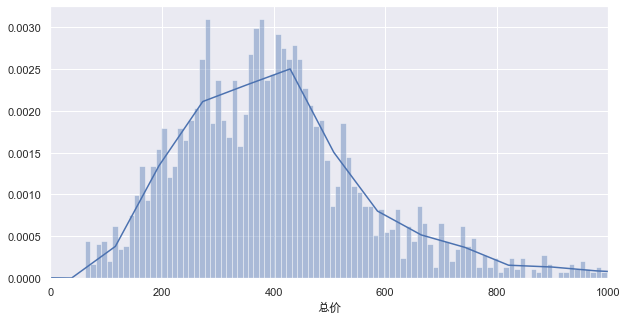

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(data['总价'],bins=1000)
plt.xlim(0,1000)

# 观察：主要房价集中在200~500之间，并在600之后呈现长尾分布

(0, 200000)

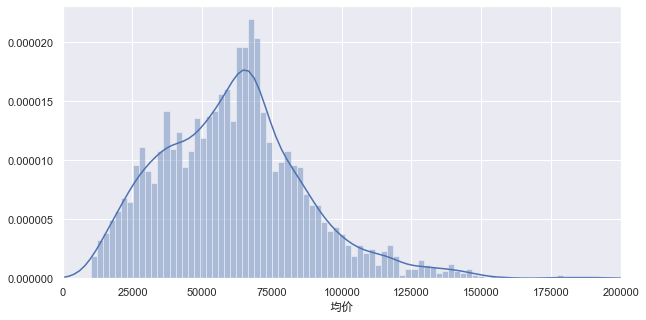

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(data['均价'],bins=100)
plt.xlim(0,200000)

# 观察：房产均价集中在3~8之间，并在10之后呈现长尾分布

(0, 200)

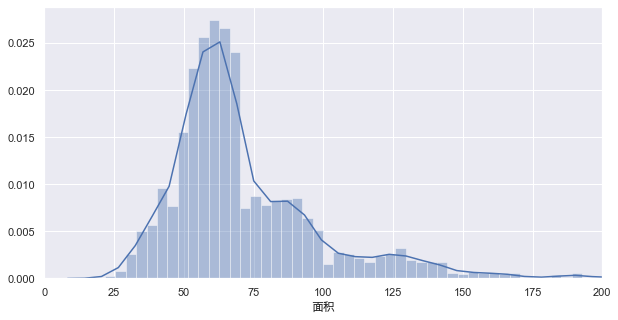

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(data['面积'],bins=200)
plt.xlim(0,200)

# 观察：房产均价集中在3~8之间，并在10之后呈现长尾分布

In [11]:
# 拆分区：split
data['区'] = data['所在区域'].str.split('\xa0',expand=True)[0]
data.head(1)

,链家编号,总价,均价,房型,面积,小区名称,所在区域,纬度,经度,区
0,1.071040e+11,360.0,39259,3室1厅,91.7,上浦小区,浦东 川沙 外环外,31.197312,121.695243,浦东


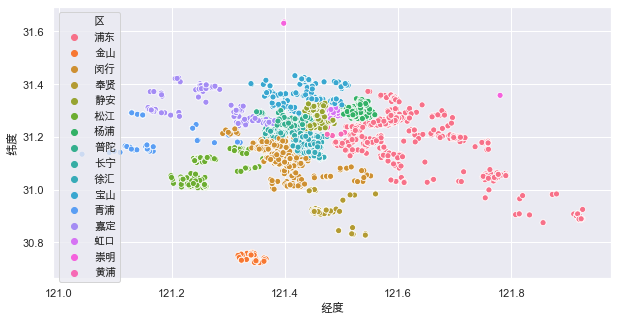

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='经度', y='纬度', hue='区')

In [13]:
# 2.4.3 特征值分布：离散变量

In [14]:
qu = pd.DataFrame(data['区'].value_counts())
qu

,区
浦东,720
闵行,471
徐汇,348
宝山,230
杨浦,191
普陀,188
嘉定,175
松江,156
静安,150
长宁,105


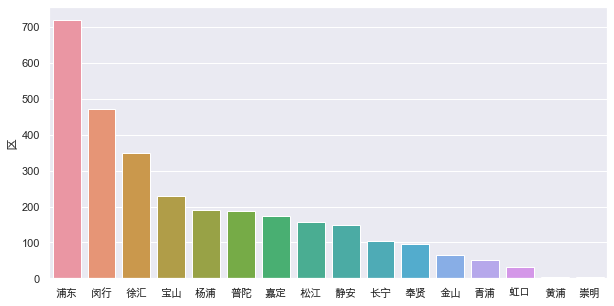

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=qu, x=qu.index, y=qu['区'])

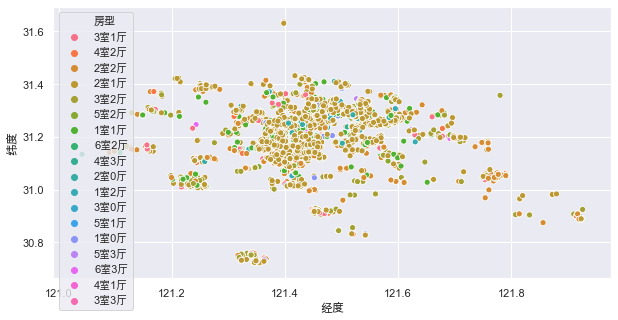

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='经度', y='纬度', hue='房型')

In [17]:
fangxing = pd.DataFrame(data['房型'].value_counts())
fangxing

,房型
2室1厅,1567
2室2厅,399
1室1厅,393
3室2厅,308
3室1厅,99
2室0厅,64
1室0厅,57
4室2厅,49
1室2厅,20
5室2厅,9


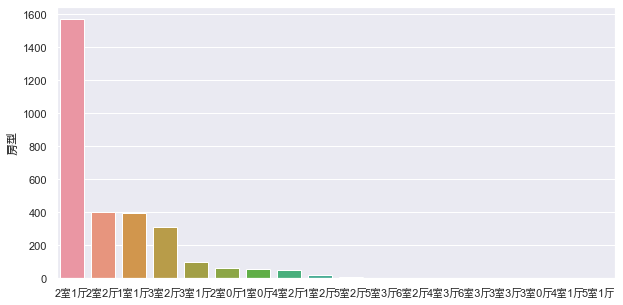

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=fangxing, x=fangxing.index, y=fangxing['房型'])

In [19]:
# 2.4.4 相关性探索：地段vs房价、房型vs房价

(0, 1000)

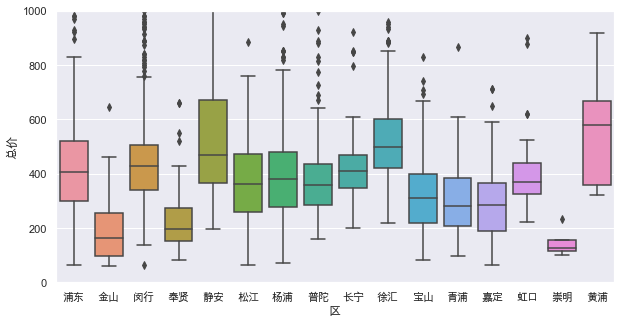

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='区', y='总价')
plt.ylim(0,1000)

(0, 150000)

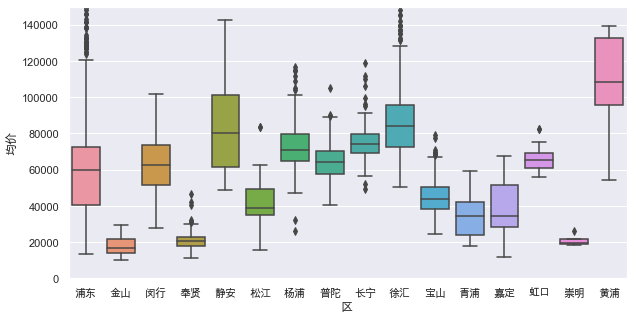

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='区', y='均价')
plt.ylim(0,150000)

(0, 150000)

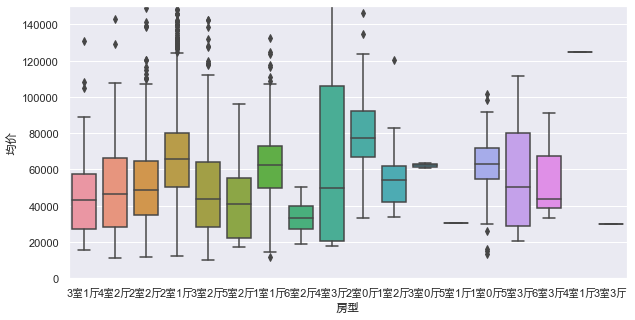

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='房型', y='均价')
plt.ylim(0,150000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

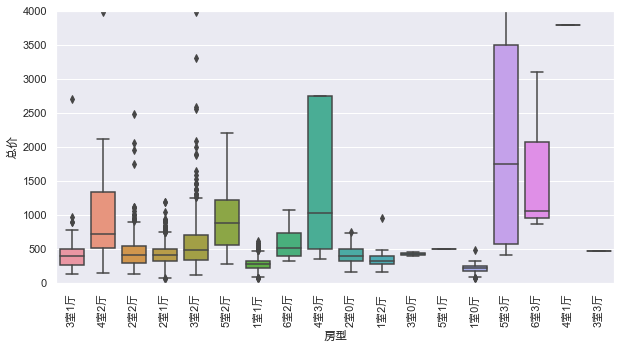

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='房型', y='总价')
plt.ylim(0,4000)
plt.xticks(rotation=90)

In [31]:
# 2.4.5 相关性探索：计算r值

In [32]:
data.corr()

,链家编号,总价,均价,面积,纬度,经度
链家编号,1.000000,-0.199020,-0.035667,-0.118465,0.015491,-0.025453
总价,-0.199020,1.000000,0.551601,0.601715,0.087930,0.050294
均价,-0.035667,0.551601,1.000000,-0.149448,0.299072,0.055106
面积,-0.118465,0.601715,-0.149448,1.000000,-0.233085,0.034087
纬度,0.015491,0.087930,0.299072,-0.233085,1.000000,-0.114004
经度,-0.025453,0.050294,0.055106,0.034087,-0.114004,1.000000


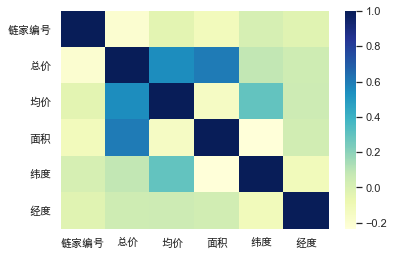

In [38]:
sns.heatmap(data.corr(),cmap="YlGnBu")